# Imports

In [59]:
# System
import os
import warnings
from datetime import timedelta
from pathlib import Path

# Data Analysis
import duckdb
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import missingno as msno
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import sqlalchemy
from sqlalchemy import create_engine

# Statistical Analysis (inferential statistics)
from scipy import stats
import scikit_posthocs as sp
from pingouin import welch_anova
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Configurations

In [46]:
""" SETTINGS FOR EDA """
load_dotenv()
# For korean in plots
koreanize_matplotlib.koreanize()
# For plotting style
plt.style.use("seaborn-v0_8-whitegrid")
# To show all columns
pd.set_option("display.max_columns", None)
# To show all rows
pd.set_option("display.max_rows", 1000)
# Display the float format rounded to the seconds decimal place
pd.options.display.float_format = "{:,.2f}".format
# Ignore all warnings
warnings.filterwarnings("ignore")


# 데이터 명세서

본 프로젝트에서 쓰인 데이터셋은 OTT 기반 데이터이며, 아래는 그에 관한 명세서이다.

### **1. 무료 체험 시작 (start.free_trial.csv)**

| **컬럼 이름** | **데이터 타입** | **설명** |
| --- | --- | --- |
| **city** | **object** | **접속 위치** |
| **client_event_time** | **object** | **타임 스탬프** |
| **country** | **object** | **접속 국가** |
| **device_carrier** | **float64** | **사용 이동통신사** |
| **device_family** | **object** | **사용 기기 유형** |
| **device_type** | **object** | **사용 기기** |
| **event_type** | **object** | **이벤트 유형** |
| **language** | **object** | **사용자 설정 언어** |
| **os_name** | **object** | **사용 브라우저 이름** |
| **os_version** | **object** | **사용 브라우저 버전** |
| **platform** | **object** | **사용 플랫폼** |
| **user_id** | **object** | **유저 id** |
| **plan.price** | **int64** | **정상가** |
| **plan.type** | **object** | **요금제 종류** |
| **trial.type** | **object** | **무료체험 방식** |

---

### **2. 첫 결제 완료 (complete.subscription.csv)**

| **컬럼 이름** | **데이터 타입** | **설명** |
| --- | --- | --- |
| **city** | **object** | **접속 위치** |
| **client_event_time** | **object** | **타임 스탬프** |
| **country** | **object** | **접속 국가** |
| **device_carrier** | **float64** | **사용 이동통신사** |
| **device_family** | **object** | **사용 기기 유형** |
| **device_type** | **object** | **사용 기기** |
| **event_type** | **object** | **이벤트 유형** |
| **language** | **object** | **사용자 설정 언어** |
| **os_name** | **object** | **사용 브라우저 이름** |
| **os_version** | **object** | **사용 브라우저 버전** |
| **platform** | **object** | **사용 플랫폼** |
| **user_id** | **object** | **유저 id** |
| **plan.price** | **int64** | **정상가** |
| **paid_amount** | **int64** | **실제 결제 금액** |
| **plan.type** | **object** | **요금제 종류** |
| **coupon.type** | **object** | **쿠폰 종류** |
| **coupon.benefit_type** | **object** | **쿠폰 혜택 종류** |
| **coupon.discount_amount** | **int64** | **할인액** |
| **pg.type** | **object** | **결제수단 타입** |


---

### **3. 만료 후 재구독 완료 (resubscribe.subscription.csv)**

| **컬럼 이름** | **데이터 타입** | **설명** |
| --- | --- | --- |
| **city** | **object** | **접속 위치** |
| **client_event_time** | **object** | **타임 스탬프** |
| **country** | **object** | **접속 국가** |
| **device_carrier** | **float64** | **사용 이동통신사** |
| **device_family** | **object** | **사용 기기 유형** |
| **device_type** | **object** | **사용 기기** |
| **event_type** | **object** | **이벤트 유형** |
| **language** | **object** | **사용자 설정 언어** |
| **os_name** | **object** | **사용 브라우저 이름** |
| **os_version** | **object** | **사용 브라우저 버전** |
| **platform** | **object** | **사용 플랫폼** |
| **user_id** | **object** | **유저 id** |
| **plan.price** | **int64** | **정상가** |
| **paid_amount** | **int64** | **실제 결제 금액** |
| **plan.type** | **object** | **요금제 종류** |
| **coupon.type** | **object** | **쿠폰 종류** |
| **coupon.benefit_type** | **object** | **쿠폰 혜택 종류** |
| **coupon.discount_amount** | **int64** | **할인액** |
| **pg.type** | **object** | **결제수단 타입** |

---

### **4. 에피소드 시청 시작 (enter.episode_page.csv)**

| **컬럼 이름** | **데이터 타입** | **설명** |
| --- | --- | --- |
| **city** | **object** | **접속 위치** |
| **client_event_time** | **object** | **타임 스탬프** |
| **country** | **object** | **접속 국가** |
| **device_carrier** | **float64** | **사용 이동통신사** |
| **device_family** | **object** | **사용 기기 유형** |
| **device_type** | **object** | **사용 기기** |
| **event_type** | **object** | **이벤트 유형** |
| **language** | **object** | **사용자 설정 언어** |
| **os_name** | **object** | **사용 브라우저 이름** |
| **os_version** | **object** | **사용 브라우저 버전** |
| **platform** | **object** | **사용 플랫폼** |
| **user_id** | **object** | **유저 id** |
| **content.id** | **object** | **콘텐츠 id** |
| **is_trial** | **boolean** | **무료 공개 에피소드에 대한 진입이면서, 그 유저가 현재 구독하지 않은 회원인지 여부** |
| **episode.id** | **object** | **에피소드 id** |
| **is_free_trial** | **boolean** | **무료 공개 에피소드에 대한 진입인지 여부, 특정 기준 시점으로 사용하지 않음** |

---

### **5. 에피소드 시청 완료 (complete.episode.csv)**

| **컬럼 이름** | **데이터 타입** | **설명** |
| --- | --- | --- |
| **city** | **object** | **접속 위치** |
| **client_event_time** | **object** | **타임 스탬프** |
| **country** | **object** | **접속 국가** |
| **device_carrier** | **float64** | **사용 이동통신사** |
| **device_family** | **object** | **사용 기기 유형** |
| **device_type** | **object** | **사용 기기** |
| **event_type** | **object** | **이벤트 유형** |
| **language** | **object** | **사용자 설정 언어** |
| **os_name** | **object** | **사용 브라우저 이름** |
| **os_version** | **object** | **사용 브라우저 버전** |
| **platform** | **object** | **사용 플랫폼** |
| **user_id** | **object** | **유저 id** |
| **content.id** | **object** | **콘텐츠 id** |
| **episode.id** | **object** | **에피소드 id** |

---


# 프로젝트에서 쓰인 함수

아래의 셀에는 프로젝트에서 쓰인 모든 함수의 모음집이다.

In [61]:
def import_data_directory_to_duckdb(data_path, db_path):
    # Connect to DuckDB database (will create a new one if it doesn't exist)
    con = duckdb.connect(db_path)
    # Iterate through all data files in the folder
    for file in os.listdir(data_path):
        
        # If the file is not a csv or parquet, skip
        if not file.endswith('.csv') and not file.endswith('.parquet'):
            continue
        
        # Split the file name and the file extension
        file_name, _ = os.path.splitext(file)
        
        # Create a table name by stripping the extension and replacing dots with underscores
        table_name = file_name.replace(".", "_")

        # Construct the full path to the data file
        file_path = os.path.join(data_path, file)

        try:
            # Create if not exists or replace a table and load the data into DuckDB
            con.execute(f"""
            CREATE OR REPLACE TABLE {table_name} AS
            SELECT * FROM '{file_path}';
            """)
        except duckdb.CatalogException:
            # If the table already exists, catch the exception and print a message
            print(f"The table: '{table_name}' already exists.")

        except Exception as e:
            # Catch any other exceptions that may occur
            print(f"An error occurred: {e}")
        else:
            # If there were no errors
            print(f"Inserted {file_name} into table {table_name}")

    # Close the connection when done
    con.close()

def import_data_directory_to_postgres(data_path, engine, extension=".csv"):
    # Define the file paths for your CSV files

    csv_files = {}

    data_files = os.listdir(data_path)

    data_files = [file for file in data_files if file.endswith(extension)]

    for file_name in data_files:
        table_name = Path(file_name).stem
        full_file_path = os.path.join(
            data_path, file_name
        )  # Create full path to the file
        csv_files[table_name] = full_file_path

    # Loop through the CSV files and import them into PostgreSQL
    for table_name, file_path in csv_files.items():
        df = pd.read_csv(file_path)
        df.to_sql(table_name, engine, if_exists="replace", index=False)
        print(f"Table: {table_name}, successful import.")

def get_table_info(table_name, engine):
    # Load the entire table to infer data types and count duplicates
    query = f"SELECT * FROM {table_name}"
    
    # Check if the engine is a PostgreSQL engine (SQLAlchemy)
    if isinstance(engine, sqlalchemy.engine.base.Engine):
        print("Detected PostgreSQL engine.")
        df = pd.read_sql(query, engine)

    # Check if the engine is a DuckDB connection
    elif isinstance(engine, duckdb.DuckDBPyConnection):
        print("Detected DuckDB engine.")
        df = engine.execute(query).df()
        
    else:
        raise ValueError(
            "Unsupported engine type. Please provide a PostgreSQL or DuckDB engine."
        )
        
    # Store stats columns    
    stats = []

    # Get total number of rows
    total_rows = len(df)
    # Get total number of columns
    total_cols = len(df.columns)

    # Count duplicate rows
    duplicate_count = df.duplicated().sum()

    # Loop through each column to gather statistics
    for col in df.columns:
        # Get number of null values in the column
        null_count = df[col].isnull().sum()
        # Calculate the null ratio
        null_ratio = round((null_count / total_rows),2)
        # Get the column data type
        dtype = df[col].dtype
        # Get quantity of unique values for the column
        unique_count = df[col].nunique()
        # Append stats for the column
        stats.append([table_name, col, null_count, null_ratio, dtype, unique_count, duplicate_count])

    # Convert the stats list to a DataFrame
    df_stats = pd.DataFrame(stats, columns=['dataset_names', 'features', 'null_count', 'null_ratio', 'dtype', 'unique_count', 'duplicate_count'])

    # Add total rows and total columns as additional columns
    df_stats['shape'] = f"({total_rows}, {total_cols})"
    
    col_orders = ['dataset_names', 'shape', 'features', 'duplicate_count', 'null_count', 'null_ratio', 'dtype', 'unique_count']
    
    return df_stats[col_orders]

def get_table_names(data_path):
    datafiles = os.listdir(data_path)
    table_names = [
        name.replace(".csv", "").replace(".", "_")
        for name in datafiles
        if name.endswith(".csv")
    ]
    return table_names

def get_metadata_of_all_tables(data_path, db_path):
    # Parameters for get_table_info()
    table_names = get_table_names(data_path)
    engine = duckdb.connect(db_path)

    # Apply to all tables and merge the results
    df_all_stats = pd.concat(
        [get_table_info(table, engine) for table in table_names]
    ).reset_index(drop=True)

    # Close the connection when done
    engine.close()

    return df_all_stats

def color_table_by_column_unique_values(df, column, palette):
    tables = df[column].unique()
    # Get colors from the seaborn dark palette
    colors = sns.color_palette(palette, len(tables)) # dark

    # Create a color map for each dataset name
    color_map = {table: colors[i] for i, table in enumerate(tables)}

    # Function to style the DataFrame with font colors based on dataset names
    def style_font_color(row):
        color = color_map[row[column]]
        color_hex = f'rgb({int(color[0] * 255)}, {int(color[1] * 255)}, {int(color[2] * 255)})'
        return [f'color: {color_hex}'] * len(row)

    # Function to apply the colors to each row based on dataset_name
    def style_background_color(row):
        color = color_map[row[column]]
        return [f'background-color: rgba({color[0] * 255}, {color[1] * 255}, {color[2] * 255}, 0.8)'] * len(row)


    # Apply styling to the DataFrame
    styled_df = df.style.apply(style_background_color, axis=1)
    
    return styled_df

def read_metadata_color_coded(metadata_path):
    df = pd.read_csv(metadata_path)
    df = color_table_by_column_unique_values(df, "dataset_names", "dark")
    return df

def query_data(table_name, db_path):
    con_duckdb = duckdb.connect(db_path)
    df = con_duckdb.execute(f"SELECT * FROM {table_name}").df()
    return df

def drop_unnecessary_rows(df):
    """Drop rows that do not meet the specified conditions."""
    # Save only South Korea
    korean_countries = df["country"] == "South Korea"
    # Save only Korean
    korean_languages = df["language"] == "Korean"
    # Save only Dates from 2022-01-01 and onwards
    from_2022_01_onwards = df["client_event_time"] >= pd.Timestamp("2022-01-01")

    # Drop rows that do not meet the conditions
    df.drop(
        index=df.loc[
            ~korean_countries | ~korean_languages | ~from_2022_01_onwards
        ].index,
        errors="ignore",
        inplace=True,
    )

    return df

def drop_unnecessary_columns(df):
    """Remove columns that are not needed."""
    columns_to_remove = [
        "device_carrier",
        "os_version",
        "platform",
        "genre_name",
        "country",
        "language",
        "event_type",
        "city",
    ]

    df.drop(columns=columns_to_remove, errors="ignore", inplace=True)

    return df

def remove_unnecessary_rows_and_columns_and_save_csv(data_path, to_data_path, db_path):
    table_names = get_table_names(data_path)
    for name in table_names:
        df = query_data(name, db_path)
        drop_unnecessary_rows(df)
        print(f"Table: {name} unnecessary rows dropped.")
        drop_unnecessary_columns(df)
        print(f"Table: {name} unnecessary columns dropped.")
        file = f"{name}.csv"
        new_data_path = os.path.join(to_data_path, file)
        df.to_csv(new_data_path, header=True, index=False)
        print(f"Table: {name} added to {to_data_path} directory successfully.")

def plot_categorical_barplots(df, columns):
    df_regions = df[columns]

    # Visualize Categorical Data
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

    axes = axes.flatten()

    for i, cat in enumerate(df_regions.columns):
        value_counts = df_regions[cat].value_counts().head(20)
        axes[i].bar(value_counts.index, value_counts.values)
        axes[i].set_title(f"{cat}")
        axes[i].tick_params(axis="x", labelrotation=75)

    for i in range(len(df_regions.columns), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

def get_time_frame_windows(df, date_column, window_name, date_interval):
    # Convert the date_column to datetime format if it isn't already
    df[date_column] = pd.to_datetime(df[date_column])
    start_date = pd.to_datetime("2022-01-03")
    df = df.assign(
        **{
            window_name: lambda x: (
                start_date
                + pd.to_timedelta(
                    ((x[date_column] - start_date).dt.days // date_interval)
                    * date_interval,
                    unit="D",
                )
            )
        }
    )
    return df


아래의 셀에는 프로젝트에서 쓰인 모든 SQL쿼리의 모음집이다.

In [60]:
all_unique_users = """
SELECT user_id FROM complete_episode
UNION
SELECT user_id FROM complete_subscription
UNION
SELECT user_id FROM enter_episode_page
UNION
SELECT user_id FROM resubscribe_subscription
UNION
SELECT user_id FROM start_free_trial
UNION
"""

avg_complete_episode_interval = """
WITH unique_users AS (
    SELECT DISTINCT user_id 
    FROM (
        SELECT user_id
        FROM start_free_trial
        WHERE "trial.type" = 'B'
        
        UNION 
        
        SELECT user_id
        FROM complete_subscription

        UNION

        SELECT user_id
        FROM resubscribe_subscription
    ) AS all_users
),
user_action_status AS (
SELECT
	uu.user_id
	,ce.client_event_time
	,ce."episode.id"
	,'complete_episode' AS status
FROM unique_users uu
JOIN complete_episode ce
	ON uu.user_id = ce.user_id

UNION

SELECT
	uu.user_id
	,ee.client_event_time
	,ee."episode.id"
	,'enter_episode' AS status
FROM unique_users uu
JOIN enter_episode_page ee
	ON uu.user_id = ee.user_id
),
user_complete_episode_event_times AS (
SELECT 
	user_id
	,TO_DATE(client_event_time, 'YYYY-MM-DD') AS client_event_time
FROM user_action_status
WHERE status = 'complete_episode'
GROUP BY user_id, TO_DATE(client_event_time, 'YYYY-MM-DD')
ORDER BY user_id, TO_DATE(client_event_time, 'YYYY-MM-DD')
), user_complete_episode_intervals AS (
SELECT 
	user_id
	,client_event_time
	,(LEAD(client_event_time) OVER (PARTITION BY user_id)) - client_event_time AS complete_episode_intervals
FROM user_complete_episode_event_times
)
SELECT
	user_id
	,AVG(complete_episode_intervals) AS avg_complete_episode_intervals
FROM user_complete_episode_intervals
GROUP BY user_id
ORDER BY avg_complete_episode_intervals;
"""

avg_learning_time_clean = """
WITH unique_users AS (
    SELECT DISTINCT user_id 
    FROM (
        SELECT user_id
        FROM start_free_trial
        WHERE "trial.type" = 'B'
        
        UNION 
        
        SELECT user_id
        FROM complete_subscription

        UNION

        SELECT user_id
        FROM resubscribe_subscription
    ) AS all_users
), user_enter_and_complete_episodes AS (
	SELECT
		uu.user_id
		,ce.client_event_time
		,ce."episode.id" AS episode_id
		,'complete_episode' AS status
	FROM unique_users uu
	JOIN complete_episode ce
		ON uu.user_id = ce.user_id
	
	UNION
	
	SELECT
		uu.user_id
		,ee.client_event_time
		,ee."episode.id" AS episode_id
		,'enter_episode' AS status
	FROM unique_users uu
	JOIN enter_episode_page ee
		ON uu.user_id = ee.user_id
), rows_with_episodes_completed AS (
	SELECT DISTINCT user_id, episode_id
	FROM user_enter_and_complete_episodes
	WHERE status = 'complete_episode'
), cleaned_table_for_average_learning_time AS (
	SELECT *
	FROM user_enter_and_complete_episodes
	WHERE (user_id, episode_id) IN (
		SELECT user_id, episode_id FROM rows_with_episodes_completed
	)
)
SELECT * FROM cleaned_table_for_average_learning_time;
"""

avg_learning_time = """
WITH unique_users AS (
    SELECT DISTINCT user_id 
    FROM (
        SELECT user_id
        FROM start_free_trial
        WHERE "trial.type" = 'B'
        
        UNION 
        
        SELECT user_id
        FROM complete_subscription

        UNION

        SELECT user_id
        FROM resubscribe_subscription
    ) AS all_users
)
SELECT
	uu.user_id
	,ce.client_event_time
	,ce."episode.id" AS episode_id
	,'complete_episode' AS status
FROM unique_users uu
JOIN complete_episode ce
	ON uu.user_id = ce.user_id

UNION

SELECT
	uu.user_id
	,ee.client_event_time
	,ee."episode.id" AS episode_id
	,'enter_episode' AS status
FROM unique_users uu
JOIN enter_episode_page ee
	ON uu.user_id = ee.user_id;
"""

retention_chart_2 = """
WITH unique_users AS (
    SELECT DISTINCT user_id 
    FROM (
        SELECT user_id, client_event_time
        FROM start_free_trial
        WHERE "trial.type" = 'B'
        
        UNION ALL
        
        SELECT user_id, client_event_time
        FROM complete_subscription

        UNION ALL

        SELECT user_id, client_event_time
        FROM resubscribe_subscription
    ) AS all_users
),

unique_users_in_complete_episode AS (
    SELECT DISTINCT u.user_id
    FROM unique_users u
    LEFT JOIN complete_episode e ON u.user_id = e.user_id
),

users_start_date AS (
    SELECT 
        user_id, 
        MIN(client_event_time) AS start_timestamp
    FROM (
        SELECT u.user_id, s.client_event_time
        FROM unique_users_in_complete_episode u
        LEFT JOIN start_free_trial s ON u.user_id = s.user_id

        UNION ALL

        SELECT u.user_id, cs.client_event_time
        FROM unique_users_in_complete_episode u
        LEFT JOIN complete_subscription cs ON u.user_id = cs.user_id

        UNION ALL

        SELECT u.user_id, rs.client_event_time
        FROM unique_users_in_complete_episode u
        LEFT JOIN resubscribe_subscription rs ON u.user_id = rs.user_id
    ) AS start_events
    GROUP BY user_id
)

SELECT 
    usd.user_id,
    TO_DATE(usd.start_timestamp, 'YYYY-MM-DD') AS start_timestamp,
    -- ce."episode.id" AS episode_id,
    TO_DATE(ce.client_event_time, 'YYYY-MM-DD') AS complete_episode_timestamp
    -- DATE_PART('day', ce.client_event_time::timestamp - usd.start_timestamp::timestamp) AS date_diff
FROM users_start_date usd
JOIN complete_episode ce ON usd.user_id = ce.user_id
WHERE TO_DATE(usd.start_timestamp, 'YYYY-MM-DD') <= TO_DATE(ce.client_event_time, 'YYYY-MM-DD')
ORDER BY start_timestamp;
"""

retention_chart = """
WITH unique_users AS (
    SELECT DISTINCT user_id 
    FROM (
        SELECT user_id, client_event_time
        FROM start_free_trial
        WHERE "trial.type" = 'B'
        
        UNION ALL
        
        SELECT user_id, client_event_time
        FROM complete_subscription

        UNION ALL

        SELECT user_id, client_event_time
        FROM resubscribe_subscription
    ) AS all_users
),

unique_users_in_complete_episode AS (
    SELECT DISTINCT u.user_id
    FROM unique_users u
    LEFT JOIN complete_episode e ON u.user_id = e.user_id
),

users_start_date AS (
    SELECT 
        user_id, 
        MIN(client_event_time) AS start_timestamp
    FROM (
        SELECT u.user_id, s.client_event_time
        FROM unique_users_in_complete_episode u
        LEFT JOIN start_free_trial s ON u.user_id = s.user_id

        UNION ALL

        SELECT u.user_id, cs.client_event_time
        FROM unique_users_in_complete_episode u
        LEFT JOIN complete_subscription cs ON u.user_id = cs.user_id

        UNION ALL

        SELECT u.user_id, rs.client_event_time
        FROM unique_users_in_complete_episode u
        LEFT JOIN resubscribe_subscription rs ON u.user_id = rs.user_id
    ) AS start_events
    GROUP BY user_id
)

SELECT 
    usd.user_id,
    TO_DATE(usd.start_timestamp, 'YYYY-MM-DD') AS start_timestamp,
    -- ce."episode.id" AS episode_id,
    TO_DATE(ce.client_event_time, 'YYYY-MM-DD') AS complete_episode_timestamp
    -- DATE_PART('day', ce.client_event_time::timestamp - usd.start_timestamp::timestamp) AS date_diff
FROM users_start_date usd
JOIN complete_episode ce ON usd.user_id = ce.user_id
WHERE TO_DATE(usd.start_timestamp, 'YYYY-MM-DD') <= TO_DATE(ce.client_event_time, 'YYYY-MM-DD')
ORDER BY start_timestamp
"""

# 데이터 엔지니어링

보다 빠른 데이터 쿼리를 위해 duckdb를 사용

테이블에 '.'을 '_'로 대체 (사유: sql 쿼리에서 '.' syntax에 포함 되기 때문)

In [ ]:
# Import raw data to duckdb
data_path = "../data/raw/used"
db_path = "../databases/raw_db.duckdb"
import_data_directory_to_duckdb(data_path, db_path)

Inserted resubscribe.subscription into table resubscribe_subscription
Inserted complete.episode into table complete_episode
Inserted complete.subscription into table complete_subscription
Inserted enter.episode_page into table enter_episode_page
Inserted start.free_trial into table start_free_trial


# EDA (탐색적 데이터 분석)

데이터셋의 메타 데이터 csv 만들기
- 메타 데이터에는: 테이블명, 형태, 컬럼명, 중복값, 결측값, 결측값 수, 결측값 비율, 데이터타입, 고유값이 포함된다.

In [10]:
# 오래 걸림!!!

data_path = '../data/raw/used'
db_path = '../databases/raw_db.duckdb'

df_metadata = get_metadata_of_all_tables(data_path, db_path)

df_metadata.to_csv('../data/metadata/raw_metadata.csv', header=True, index=False)

Detected DuckDB engine.
Detected DuckDB engine.
Detected DuckDB engine.
Detected DuckDB engine.
Detected DuckDB engine.


데이터셋의 메타데이터 컬러코드 테이블 생성

In [12]:
metadata_path = '../data/metadata/raw_metadata.csv'
read_metadata_color_coded(metadata_path)

,dataset_names,shape,features,duplicate_count,null_count,null_ratio,dtype,unique_count
0,resubscribe_subscription,"(791, 19)",city,0,16,0.020000,object,150
1,resubscribe_subscription,"(791, 19)",client_event_time,0,0,0.000000,datetime64[us],791
2,resubscribe_subscription,"(791, 19)",country,0,7,0.010000,object,12
3,resubscribe_subscription,"(791, 19)",device_carrier,0,791,1.000000,object,0
4,resubscribe_subscription,"(791, 19)",device_family,0,7,0.010000,object,13
5,resubscribe_subscription,"(791, 19)",device_type,0,18,0.020000,object,33
6,resubscribe_subscription,"(791, 19)",event_type,0,0,0.000000,object,1
7,resubscribe_subscription,"(791, 19)",language,0,7,0.010000,object,3
8,resubscribe_subscription,"(791, 19)",os_name,0,7,0.010000,object,13
9,resubscribe_subscription,"(791, 19)",os_version,0,7,0.010000,object,112


유저의 특성을 알아보기 위해 가장 데이터가 많은 enter_episode_page로 확인

In [15]:
db_path = '../databases/raw_db.duckdb'
table_name = 'enter_episode_page'
df_enter_episode_page = query_data(table_name, db_path)
df_enter_episode_page

,city,client_event_time,country,device_carrier,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id,is_trial,episode.id,is_free_trial
0,Wonju,2023-04-05 21:46:04.333,South Korea,None,Windows,Windows,enter.episode_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,None
1,Wonju,2023-04-05 21:55:50.787,South Korea,None,Windows,Windows,enter.episode_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,None
2,Wonju,2023-04-05 21:55:55.684,South Korea,None,Windows,Windows,enter.episode_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,None
3,Dongdaemun-gu,2023-04-05 21:04:55.828,South Korea,None,Mac,Mac,enter.episode_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,None
4,Dongdaemun-gu,2023-04-05 21:05:34.139,South Korea,None,Mac,Mac,enter.episode_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21029702,Seoul,2023-10-10 05:18:14.053,South Korea,None,Apple iPad,Apple iPad,enter.episode_page,Korean,Mobile Safari,16.6,Web,None,c269eb6df3a374b464f7c18f12fa398f,False,582f0dd769db16a3d920fd7916090efb,None
21029703,Seoul,2023-10-10 05:18:58.648,South Korea,None,Apple iPad,Apple iPad,enter.episode_page,Korean,Mobile Safari,16.6,Web,None,c269eb6df3a374b464f7c18f12fa398f,False,83c74d5802b04a1a50aa28b7bf8a5354,None
21029704,Anyang-si,2023-10-10 05:17:45.578,South Korea,None,Samsung Phone,Samsung Galaxy S23 Ultra,enter.episode_page,Korean,Samsung Browser,22.0,Web,bc1a28ff902daba9399e7f602cc86285,f4be1a0fe0e301b03115591777fddf29,False,633d1b30ed699e261ea338ad28952338,None
21029705,Anyang-si,2023-10-10 05:18:05.629,South Korea,None,Samsung Phone,Samsung Galaxy S23 Ultra,enter.episode_page,Korean,Samsung Browser,22.0,Web,bc1a28ff902daba9399e7f602cc86285,f4be1a0fe0e301b03115591777fddf29,False,b05e0fb8ab15def4b33878b9a759b4f2,None


확인하기에 앞서 결측값의 분포를 확인할 필요가 있다.
- device_carrier은 결측값이 100%이기에 제외된다.

<Axes: >

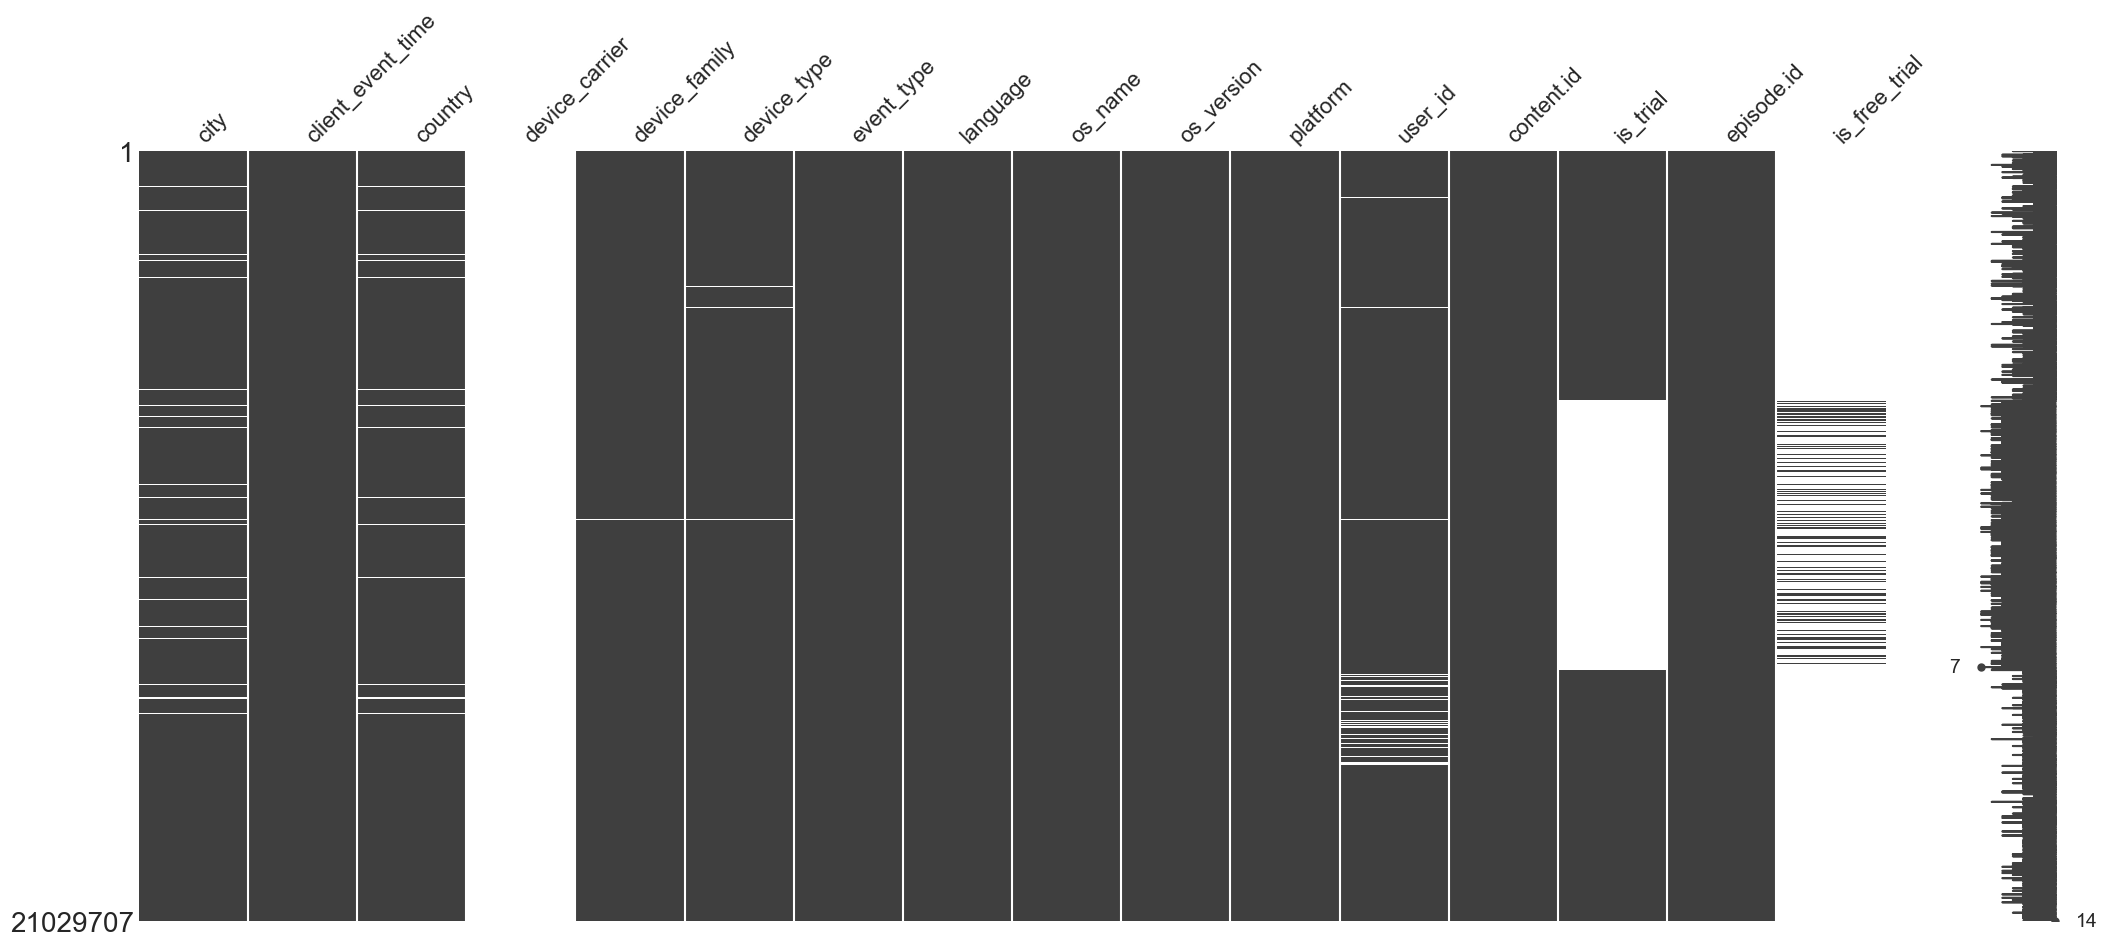

In [35]:
msno.matrix(df_enter_episode_page)

다음으로 유저의 특성을 파악하려면 데모그래픽을 확인할 수 있고 제공된 데이터에서는 지역과 관련된 country, city, language가 있다.

In [30]:
print(df_enter_episode_page['country'].value_counts(normalize=True).head(5))
print()
print(df_enter_episode_page['city'].value_counts(normalize=True).head(5))
print()
df_enter_episode_page['city'].value_counts(normalize=True).head(5)

country
South Korea     0.98
United States   0.01
Japan           0.00
Canada          0.00
Germany         0.00
Name: proportion, dtype: float64

city
Seoul         0.19
Seongnam-si   0.04
Suwon         0.04
Yongin-si     0.03
Gangnam-gu    0.03
Name: proportion, dtype: float64



city
Seoul         0.19
Seongnam-si   0.04
Suwon         0.04
Yongin-si     0.03
Gangnam-gu    0.03
Name: proportion, dtype: float64

위의 내용을 보았을 때 한국이 아닌 나라는 제외를 하고 보는 것이 좋을 것 같아, country가 South Korea가 아닌 행을 제외하고 나라와 도시 컬럼은 열을 제거하기로 함. 마찬가지로 한국어가 아닌 행을 먼저 삭제한 후에 언어 열을 제거하기로 함.

추가적인 데이터 정제를 위해 데이터의 분포를 확인해볼 것이다. 여기서 시간 데이터는 따로 봐야해서 제외하고 다른 데이터를 전체 볼 것이다.

In [ ]:
df_enter_episode_page.dtypes

city                         object
client_event_time    datetime64[us]
country                      object
device_carrier               object
device_family                object
device_type                  object
event_type                   object
language                     object
os_name                      object
os_version                   object
platform                     object
user_id                      object
content.id                   object
is_trial                     object
episode.id                   object
is_free_trial                object
dtype: object

유저의 지역 데이터 분포 확인: 위에서 봤던대로 한국과 관련된 유저가 많아, 이 외의 지역은 분석에서 제외.

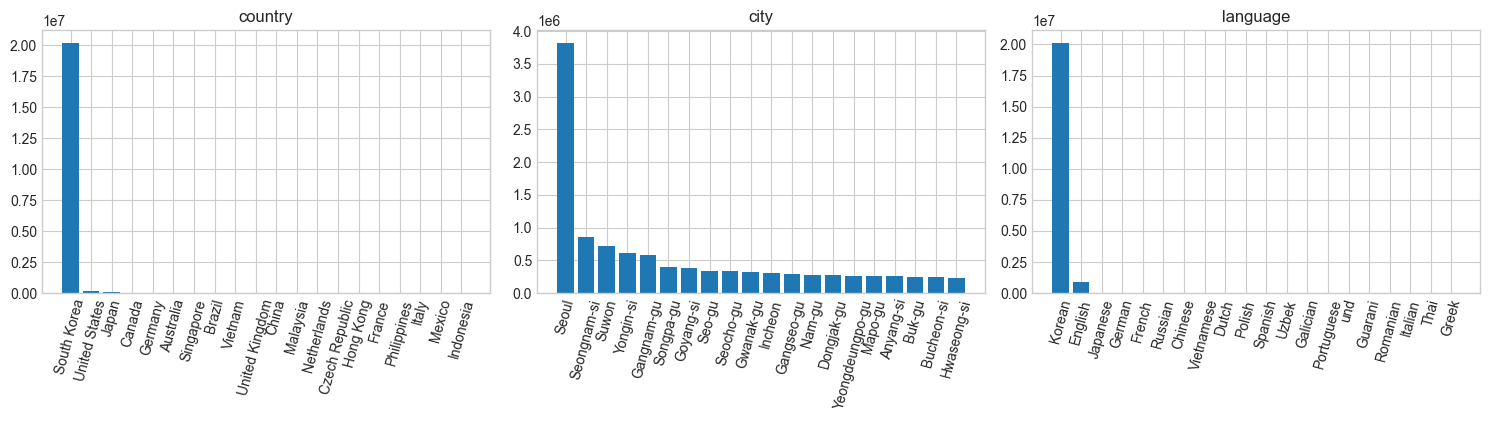

In [26]:
plot_categorical_barplots(df_enter_episode_page, ["country", "city", "language"])

유저의 기기 특성 확인: 기기는 윈도우스와 크롬이 압도적으로 많은 것을 확인 할 수 있다. 이는 핸드폰보다 컴퓨터로 많이 시청하는 OTT 서비스라는 것을 알 수 있다.

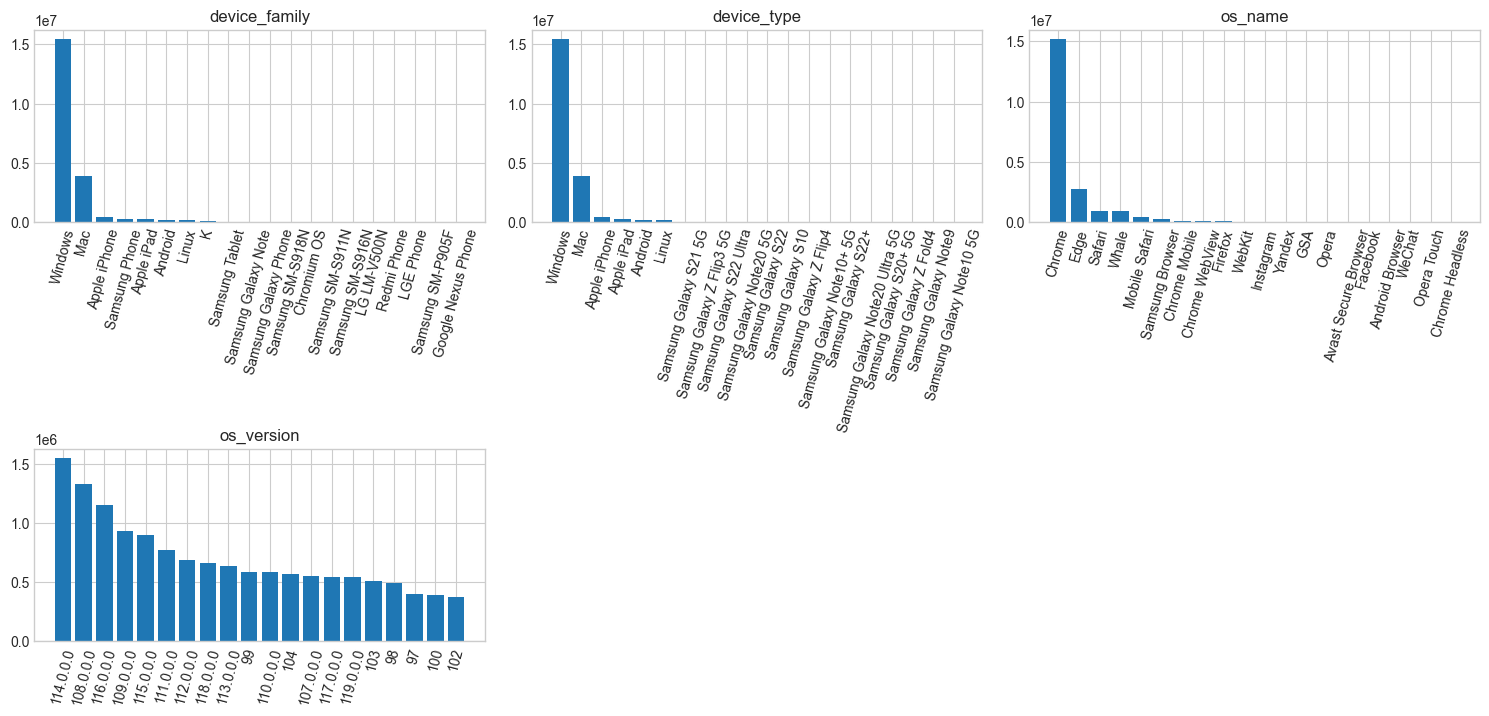

In [27]:
plot_categorical_barplots(
    df_enter_episode_page, ["device_family", "device_type", "os_name", "os_version"]
)

event_type 컬럼의 내용을 확인 했을 때 한가지(테이블 명)의 데이터를 포함하고 있어서 이를 제외하기로 함

platform 컬럼도 마찬가지로 한가지(Web)의 데이터를 포함하고 있어서 제외하기로 함

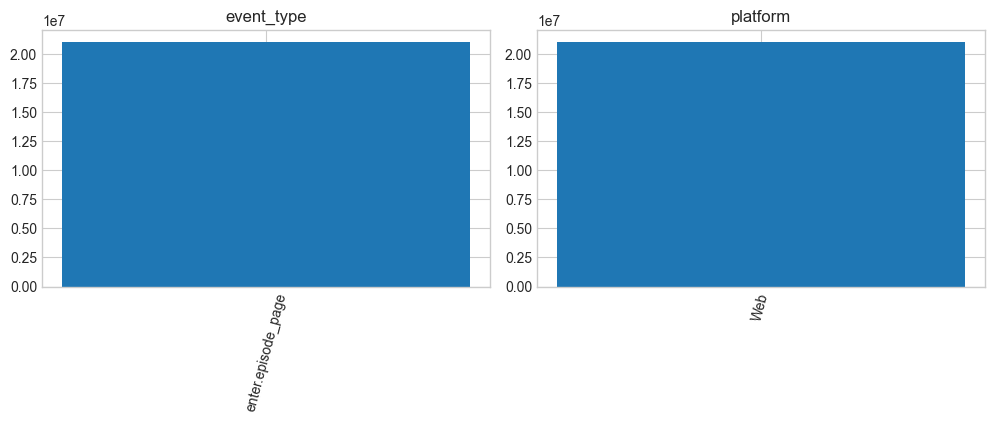

In [52]:
plot_categorical_barplots(
    df_enter_episode_page, ['event_type', 'platform']
)

마지막으로 에피소드(컨텐츠)를 시청하는 시간 및 트래픽을 확인할 필요가 있다. 아래 데이터에서 볼 수 있듯이 2022-01-01 전과 2023-12-31 후의 데이터는 이상치임으로 제거할 필요가 있다.

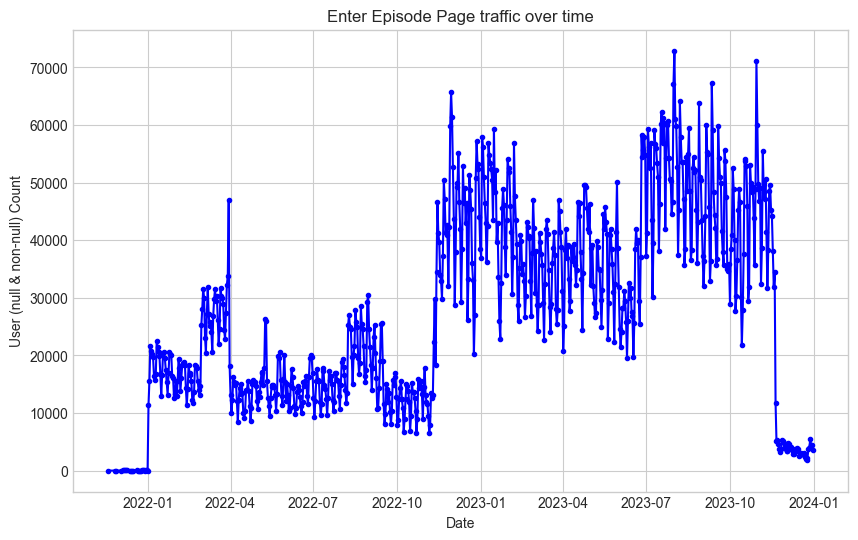

In [38]:
date_counts = (
    df_enter_episode_page.groupby(df_enter_episode_page['client_event_time'].dt.date)
    .agg({'user_id': 'size'})
    .reset_index(names=['client_event_time', 'count'])
)

plt.figure(figsize=(10,6))
plt.plot(
    date_counts['client_event_time'],
    date_counts['user_id'],
    marker='o',
    color='b',
    markersize=3
)
plt.title("Enter Episode Page traffic over time")
plt.xlabel("Date")
plt.ylabel("User (null & non-null) Count")
plt.grid(True)
plt.show()

# 데이터 정제

위에서 얻은 내용으로 한국 또는 한국어가 아닌 데이터는 행을 제거한 후에 열을 제거하고 날짜가 2022-01-01일 전이거나 2023-12-31일 후 데이터는 행을 삭제하고 데이터를 interim폴더에 적재

In [ ]:
# 오래 걸림!!!
data_path = '../data/raw/used'
to_data_path = '../data/interim'
db_path = '../databases/raw_db.duckdb'
remove_unnecessary_rows_and_columns_and_save_csv(data_path, to_data_path, db_path)

Table: resubscribe_subscription unnecessary rows dropped.
Table: resubscribe_subscription unnecessary columns dropped.
Table: resubscribe_subscription added to ../data/interim directory successfully.
Table: complete_episode unnecessary rows dropped.
Table: complete_episode unnecessary columns dropped.
Table: complete_episode added to ../data/interim directory successfully.
Table: complete_subscription unnecessary rows dropped.
Table: complete_subscription unnecessary columns dropped.
Table: complete_subscription added to ../data/interim directory successfully.
Table: enter_episode_page unnecessary rows dropped.
Table: enter_episode_page unnecessary columns dropped.
Table: enter_episode_page added to ../data/interim directory successfully.
Table: start_free_trial unnecessary rows dropped.
Table: start_free_trial unnecessary columns dropped.
Table: start_free_trial added to ../data/interim directory successfully.


새로운 정제된 interim 데이터를 복잡한 SQL 쿼리를 사용하기 위해 postgresql 서버에 적재. (사유: duckdb는 분석에 용이하지만 쿼리가 복잡해지면 안 돌아가는 오류를 발견)

In [39]:
# 오래 걸림!!!
data_path = '../data/interim'
db_params = {
    "host": "127.0.0.1",
    "database": "ott_db",
    "user": "postgres",
    "password": os.environ.get("PASSWORD"),
    "port": "5432",
}
engine = create_engine(
    f'postgresql://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}/{db_params["database"]}'
)
import_data_directory_to_postgres(data_path, engine)

Table: enter_content_page, successful import.
Table: renew_subscription, successful import.
Table: enter_payment_page, successful import.
Table: enter_episode_page, successful import.
Table: click_content_page_start_content_button, successful import.
Table: start_free_trial, successful import.
Table: complete_subscription, successful import.
Table: click_content_page_more_review_button, successful import.
Table: complete_episode, successful import.
Table: complete_signup, successful import.
Table: enter_main_page, successful import.
Table: resubscribe_subscription, successful import.
Table: enter_signup_page, successful import.
Table: start_content, successful import.
Table: click_cancel_plan_button, successful import.
Table: end_content, successful import.
Table: click_episode_page_related_comment_box, successful import.


# 리텐션 분석

AARRR에서 리텐션을 높이는 분석을 하기로 했으며, 주간 리텐션 차트를 생성한다

범위는 월요일에서 시작해 일요일까지 한 주로 설정하여 2022-01-01은 토요일 2022-01-2는 일요일이므로, 월요일인 2022-01-03부터 2022-12-31일까지의 기간을 주간 코호트로 나눠서 리텐션 차트를 생성한다.

리텐션을 결정하는 행위는 complete_episode로 설정했다. 이는 우리가 해결하고자 하는 비즈니스 모델은 '배움의 기쁨'을 최대화 시키자는 의미에서 설정했다. 결국에는 유저가 접속해 컨텐츠(에피소드)를 소모하는 것이 배움이고 이를 지속적으로 한다면 기쁨이라 여기는 가설이다.

In [63]:
# Query
query_retention_chart = retention_chart

# Query Dataframe
df_retention_chart = pd.read_sql_query(query_retention_chart, con=engine)

# Change Timestamps to datetime
df_retention_chart["start_timestamp"] = pd.to_datetime(
    df_retention_chart["start_timestamp"]
)
df_retention_chart["complete_episode_timestamp"] = pd.to_datetime(
    df_retention_chart["complete_episode_timestamp"]
)

df_retention_chart.loc[
    df_retention_chart["start_timestamp"]
    > df_retention_chart["complete_episode_timestamp"]
]


df_retention_chart = get_time_frame_windows(
    df_retention_chart, "start_timestamp", "cohort_date", 7
)
df_retention_chart = get_time_frame_windows(
    df_retention_chart, "complete_episode_timestamp", "complete_episode_date", 7
)

# Calculate the Cohort Size
cohort_size = (
    df_retention_chart.groupby(["cohort_date"])["user_id"].nunique().reset_index()
)
cohort_size.rename(columns={"user_id": "cohort_size"}, inplace=True)
cohort_size


# Truncate duplicates because only one completion per timeframe is enough (4 days)
user_trans_trunc = (
    df_retention_chart[["user_id", "cohort_date", "complete_episode_date"]]
    .drop_duplicates()
    .reset_index(drop=True)
)
user_trans_trunc

# Calculate the time difference in 7-day intervals
user_trans_trunc["date_diff"] = (
    user_trans_trunc["complete_episode_date"] - user_trans_trunc["cohort_date"]
).dt.days // 7
user_trans_trunc

# Let’s pivot the data with date_diff as columns and cohort_date as rows. The value of each cell will be the count unique of retained users.
date_pivot_count = pd.DataFrame(
    pd.pivot_table(
        user_trans_trunc,
        values="user_id",
        index="cohort_date",
        columns="date_diff",
        aggfunc=lambda x: len(x.unique()),
    ).to_records()
)
date_pivot_count


# Join with the cohort size dataframe
date_pivot_join = pd.merge(cohort_size, date_pivot_count, how="inner", on="cohort_date")
date_pivot_join

# Get the Retention Rate
date_pivot_pct = date_pivot_join[["cohort_date", "cohort_size"]]
for i in range(0, len(date_pivot_join.columns) - 2):
    date_pivot_pct[str(i)] = (
        np.round(
            (date_pivot_join[str(i)] / date_pivot_join["cohort_size"]) * 100,
            0,
        )
        .fillna(0)
        .astype(int)
    )

# Transform to percentage (number of retained users in each month/cohort size)
date_pivot_pct = date_pivot_pct.fillna(0)
date_pivot_pct["cohort_date"] = date_pivot_pct["cohort_date"].astype(str)
date_pivot_pct["cohort_size"] = date_pivot_pct["cohort_size"].astype(str)
date_pivot_pct = date_pivot_pct.iloc[1:]

# Save retention chart to csv
date_pivot_pct.to_csv("../data/retention_chart_7days.csv", header=True, index=False)

# Color dataframe
date_pivot_pct.style.background_gradient(cmap="Blues", vmin=0, vmax=100)


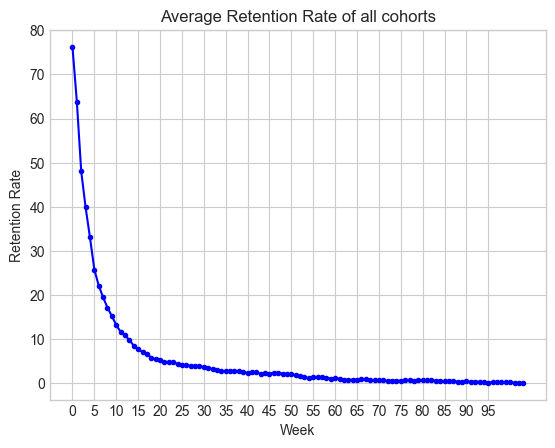

In [56]:
df_weekly_retention_chart = pd.DataFrame(
    date_pivot_pct.iloc[:, 2:].T.mean(axis=1, skipna=True)
)


plt.plot(
    df_weekly_retention_chart.index,
    df_weekly_retention_chart[0],
    marker="o",
    color="b",
    markersize=3,
)
plt.xticks(
    np.arange(
        int(df_weekly_retention_chart.index.min()),
        int(df_weekly_retention_chart.index.max()) + 1,
        5,
    )
)
plt.title('Average Retention Rate of all cohorts')
plt.xlabel('Week')
plt.ylabel('Retention Rate')
plt.show()

코호트별 3개월 데이터를 뽑아서 리텐션을 보기로함

3개월은 한 달에 4주가 있다고 가정해서 총 12주로 설정했다.

아래의 차트에서:  
retention_rate: 12주 출석 비율  
count: 출석 비율 지점까지 유저 수  
cumulative_count: 출석 비율 지점까지의 누적 유저 수  
cumulative_percentage: 출석 비율 지점까지의 누적 유저 비율  

In [53]:
# Initialize the dictionary to store the retention data
dict_retention_users_3months = {"user_id": [], "cohort_group": [], "retention_rate": []}

# Get unique, sorted time frames for cohort dates
time_frames = list(df_retention_chart["cohort_date"].sort_values().unique())

# Precompute the `complete_episode_date`s for each user
user_dates = (
    user_trans_trunc.groupby("user_id")["complete_episode_date"].apply(set).to_dict()
)

# Iterate over unique users and their respective cohort groups
for user, cohort_group in (
    user_trans_trunc[["user_id", "cohort_date"]].drop_duplicates().values
):
    # Initialize retention rate and append user and cohort group to results dictionary
    retention_rate = 0
    dict_retention_users_3months["user_id"].append(user)
    dict_retention_users_3months["cohort_group"].append(cohort_group)

    # Get the start and end indices for the time frame within 1 month (12 x 7-day intervals)
    start_time_frame = time_frames.index(cohort_group)
    end_time_frame = start_time_frame + 12

    # Check if each time frame within 1 month has a corresponding complete_episode_date
    for frame in range(start_time_frame, end_time_frame):
        if frame < len(time_frames) and time_frames[frame] in user_dates.get(
            user, set()
        ):
            retention_rate += 1

    # Append the calculated retention rate for this user and cohort group
    dict_retention_users_3months["retention_rate"].append(retention_rate)

# Convert the dictionary to a DataFrame
df_retention_users_3months = pd.DataFrame(dict_retention_users_3months)
df_retention_users_3months = df_retention_users_3months.loc[
    df_retention_users_3months["cohort_group"] <= "2023-10-09"
]
df_retention_users_3months["retention_rate"] = (
    df_retention_users_3months["retention_rate"]
    / df_retention_users_3months["retention_rate"].max()
)
df_retention_rate_3months = (
    df_retention_users_3months["retention_rate"]
    .value_counts()
    .sort_index(ascending=False)
    .reset_index()
)
# Calculate the cumulative sum
df_retention_rate_3months["cumulative_count"] = df_retention_rate_3months[
    "count"
].cumsum()
df_retention_rate_3months["cumulative_percentage"] = (
    df_retention_rate_3months["cumulative_count"]
    / df_retention_rate_3months["count"].sum()
    * 100
)
df_retention_rate_3months


,retention_rate,count,cumulative_count,cumulative_percentage
0,1.00,295,295,2.58
1,0.92,250,545,4.76
2,0.83,277,822,7.18
3,0.75,378,1200,10.48
4,0.67,465,1665,14.54
5,0.58,565,2230,19.47
6,0.50,716,2946,25.72
7,0.42,1046,3992,34.86
8,0.33,1340,5332,46.56
9,0.25,1474,6806,59.43


위의 내용을 보았을 때 임의로 리텐션 사분위수로 나눴을 때 인구의의 비율에서 핵심 유저(10%), 일시적 유저(50%), 냉담 유저(40%)로 나와서 이를 세그멘테션해 다른 지표들관의 일관성을 검정하려고 한다.

In [57]:
bins = [0, 0.25, 0.75, 1.01]
labels = ["냉담", "일시적", "핵심"]
df_retention_users_3months["segmentation"] = pd.cut(
    df_retention_users_3months["retention_rate"],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True,
)

df_user_segmentation = df_retention_users_3months[["user_id", "segmentation"]]
df_user_segmentation.to_csv("../data/user_segmentation.csv", header=True, index=False)
df_user_segmentation

,user_id,segmentation
0,28562e887d0942c8f422f1ffa1c12bc0,냉담
1,92cf46463225e0912034afda9baabbc5,냉담
2,f08a147f59d079a1cbaed0c7066c04f1,냉담
3,10c43b95e86fd0feb871bd21bede50c6,일시적
4,97c0a306a466b44643469ebf1d4b57e3,일시적
...,...,...
11447,c0f0ffa766c417dc516517946f7fb9e5,핵심
11448,63b5ee0826897bb416aad272f67c27d4,일시적
11449,943e4c673bb386d6514775f17039b092,일시적
11450,835f0ebe5bbdcd0f170f2e0ddaf6cfbf,냉담


위의 데이터는 3개월 범위에서(12주)의 리텐션을 보았는데 지속성을 내포하는 지푠는 아니다. 예를 들어, 리센션 50%를 보았을 때 6주를 연속으로 활동하고 나머지 6주를 빠지거나, 격주로 12주를 채워도 같다. 그렇기 때문에 접속해 complete_episode(학습)을 어느정도의 간격으로 완료하는지를 보려고 했다.

In [ ]:
# Query
query_avg_complete_episode_interval = avg_complete_episode_interval

# Query Dataframe
df_avg_complete_episode_interval = pd.read_sql_query(
    query_avg_complete_episode_interval, con=engine
)

# merge user_segmentation with avg_complete_episode_interval
df_user_segmentation_avg_complete_episode_interval = pd.merge(
    df_user_segmentation,
    df_avg_complete_episode_interval,
    how="inner",
    left_on="user_id",
    right_on="user_id",
)
# check that the null values are only for 냉담 users
df_user_segmentation_avg_complete_episode_interval.loc[
    df_user_segmentation_avg_complete_episode_interval[
        "avg_complete_episode_intervals"
    ].isna()
]["segmentation"].value_counts()
# drop the null value rows from the user_segmentation_avg_complete_episode_interval
df_user_segmentation_avg_complete_episode_interval.dropna(
    subset=["avg_complete_episode_intervals"], inplace=True
)

# Save to csv (user, segment, avg_complete_episode_interval)
df_user_segmentation_avg_complete_episode_interval.to_csv(
    "../data/user_segment_complete_episode_interval.csv", header=True, index=False
)

# table for average complete episode intervals per segmentation
df_segmentation_avg_complete_episode_interval = (
    df_user_segmentation_avg_complete_episode_interval[
        ["segmentation", "avg_complete_episode_intervals"]
    ]
    .groupby("segmentation")
    .agg({"avg_complete_episode_intervals": "mean"})
    .sort_values(by="avg_complete_episode_intervals")
    .reset_index()
)


df_segmentation_avg_complete_episode_interval

,segmentation,avg_complete_episode_intervals
0,핵심,4.10
1,일시적,7.82
2,냉담,17.33


# 추론 통계: ANOVA

리텐션을 기반으로 나눈 세그먼트(핵심, 일시적, 냉담 유저) 간에 접속 및 학습 간격의 차이가 존재 했고 세그먼트가 유의미한 차이가 있는지 확인하기 위해 ANOVA를 진행하기로 했다.

In [66]:
df_user_segmentation_avg_complete_episode_interval = pd.read_csv('../data/user_segment_complete_episode_interval.csv')
df_user_segmentation_avg_complete_episode_interval.head()

,user_id,segmentation,avg_complete_episode_intervals
0,a89123f1d97f09d59983c3a65e094f05,냉담,1.42
1,b5c154df7f2079bb88178ad14eba4629,냉담,2.33
2,8fd8c461957abd33e8856bad3e6a78ce,일시적,10.20
3,710f80793fdab120ffc73be9a0e121e8,냉담,9.07
4,4661d6def294c8eff2e7c6d49170f5a0,일시적,21.65


In [67]:
df_user_segmentation_avg_complete_episode_interval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10177 entries, 0 to 10176
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         10177 non-null  object 
 1   segmentation                    10177 non-null  object 
 2   avg_complete_episode_intervals  10177 non-null  float64
dtypes: float64(1), object(2)
memory usage: 238.6+ KB


데이터프레임에 총 10,177개 행이 잘 들어있고, 결측치가 존재하지 않는다.

In [69]:
# 사용자 세그먼트별로 각 사용자의 평균 complete.episode day interval들을 Series로 저장

df_user_segmentation_avg_complete_episode_interval_core = df_user_segmentation_avg_complete_episode_interval.loc[df_user_segmentation_avg_complete_episode_interval['segmentation']=='핵심', 'avg_complete_episode_intervals']
df_user_segmentation_avg_complete_episode_interval_temp = df_user_segmentation_avg_complete_episode_interval.loc[df_user_segmentation_avg_complete_episode_interval['segmentation']=='일시적', 'avg_complete_episode_intervals']
df_user_segmentation_avg_complete_episode_interval_cold = df_user_segmentation_avg_complete_episode_interval.loc[df_user_segmentation_avg_complete_episode_interval['segmentation']=='냉담', 'avg_complete_episode_intervals']

In [70]:
# 사용자 세그먼트별 평균 complete.episode day interval

print("[사용자 세그먼트별 평균 complete.episode day interval]\n")
print(f"핵심 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_core), 2)}일")
print(f"일시적 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_temp), 2)}일")
print(f"냉담 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_cold), 2)}일")

[사용자 세그먼트별 평균 complete.episode day interval]

핵심 사용자: 4.1일
일시적 사용자: 7.82일
냉담 사용자: 17.35일


우리는 사용자 세그먼트별 평균 `complete.episode` day interval의 차이가 유의미하게 있는지를 알아보기 위해 ANOVA를 진행하려 한다.

In [71]:
# 사용자 세그먼트별 사용자 수
print("[사용자 세그먼트별 사용자 수]\n")
print(f"핵심 사용자: {df_user_segmentation_avg_complete_episode_interval_core.size}명")
print(f"일시적 사용자: {df_user_segmentation_avg_complete_episode_interval_temp.size}명")
print(f"냉담 사용자: {df_user_segmentation_avg_complete_episode_interval_cold.size}명")

[사용자 세그먼트별 사용자 수]

핵심 사용자: 1200명
일시적 사용자: 5602명
냉담 사용자: 3375명


### **ANOVA 진행 전 데이터 사전 검정**

* ANOVA를 진행하기 전 데이터에 대한 사전 검정이 필요하다.
* 첫째로 각 세그먼트의 데이터가 정규성을 만족하고, 둘째로 세 세그먼트의 데이터가 등분산성을 만족해야 ANOVA를 진행할 수 있다.

#### **1. 정규성 검정**

* 사용자 세그먼트별 사용자 수를 확인하면 핵심 사용자와 냉담 사용자는 5000명 미만이고, 일시적 사용자는 5000명 이상인 것을 확인할 수 있다.
* 따라서 핵심 사용자와 냉담 사용자는 Shapiro-Wilk test로, 일시적 사용자는 Anderson-Darling test로 정규성 검정을 진행한다.

In [72]:
# 핵심 사용자 세그먼트 정규성 검정

print(stats.shapiro(df_user_segmentation_avg_complete_episode_interval_core))

ShapiroResult(statistic=np.float64(0.7803049517332195), pvalue=np.float64(2.397530332328201e-37))


* p-value가 2.397530332328133e-37로 매우 작으므로, 핵심 사용자 세그먼트의 데이터는 정규성을 만족하지 못한다고 할 수 있다.

In [73]:
# 일시적 사용자 세그먼트 정규성 검정

print(stats.anderson(df_user_segmentation_avg_complete_episode_interval_temp, dist='norm'))

AndersonResult(statistic=np.float64(520.4958730339786), critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(7.815574260149581), scale=np.float64(9.405563557876654))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


* 검정통계량 값은 520.4958730339786로, 유의수준이 1%일 때의 임계값인 1.091보다도 매우 크다.
* 따라서 일시적 사용자 세그먼트의 데이터가 정규분포에서 추출되었다는 귀무가설은 기각된다.
* 즉 일시적 사용자 세그먼트의 데이터는 정규성을 만족하지 못한다고 할 수 있다.

In [74]:
# 냉담 사용자 세그먼트 정규성 검정

print(stats.shapiro(df_user_segmentation_avg_complete_episode_interval_cold))

ShapiroResult(statistic=np.float64(0.4137242703638174), pvalue=np.float64(3.5025161259193495e-74))


* p-value가 3.5025161259193495e-74로 매우 작으므로, 냉담 사용자 세그먼트의 데이터는 정규성을 만족하지 못한다고 할 수 있다.

* test 결과, 사용자 세그먼트별로 각 사용자의 평균 `complete.episode` day interval들은 **정규성을 만족하지 못한다**.
* 하지만 위에서 사용한 test는 귀무가설이 채택되기 상당히 까다로운 test이다.
* 이로 인해 **실무에서는 왜도의 절대값이 2보다 작고, 첨도가 7보다 작으면 정규성을 만족한다**고 본다. (표본 수가 300 이상일 경우)  
참고: [Statistical notes for clinical researchers: assessing normal distribution (2) using skewness and kurtosis](https://pmc.ncbi.nlm.nih.gov/articles/PMC3591587/)

##### **Practical Approach: 왜도와 첨도 이용**

In [75]:
# 사용자 세그먼트별 데이터의 왜도의 절대값 계산

print("[사용자 세그먼트별 데이터의 왜도의 절대값]\n")
print(f"핵심 사용자: {round(abs(stats.skew(df_user_segmentation_avg_complete_episode_interval_core, bias=False)), 2)}")
print(f"일시적 사용자: {round(abs(stats.skew(df_user_segmentation_avg_complete_episode_interval_temp, bias=False)), 2)}")
print(f"냉담 사용자: {round(abs(stats.skew(df_user_segmentation_avg_complete_episode_interval_cold, bias=False)), 2)}")

[사용자 세그먼트별 데이터의 왜도의 절대값]

핵심 사용자: 2.44
일시적 사용자: 4.11
냉담 사용자: 6.32


* 왜도의 절대값이 모두 2보다 크다.

In [76]:
# (왜도의 절대값이 모두 2보다 크면 무용지물이지만) 사용자 세그먼트별 데이터의 첨도 계산

print("[사용자 세그먼트별 데이터의 첨도]\n")
print(f"핵심 사용자: {round(stats.kurtosis(df_user_segmentation_avg_complete_episode_interval_core, fisher=True), 2)}")
print(f"일시적 사용자: {round(stats.kurtosis(df_user_segmentation_avg_complete_episode_interval_temp, fisher=True), 2)}")
print(f"냉담 사용자: {round(stats.kurtosis(df_user_segmentation_avg_complete_episode_interval_cold, fisher=True), 2)}")

[사용자 세그먼트별 데이터의 첨도]

핵심 사용자: 9.31
일시적 사용자: 29.69
냉담 사용자: 58.88


* 첨도가 모두 7보다 크다.

* 즉 왜도와 첨도를 이용해도 사용자 세그먼트별 데이터들은 정규성을 만족하지 못한다.
* 따라서 ANOVA를 진행할 수 없으므로 Kruskal-Wallis H Test를 진행한다.

### **Kruskal-Wallis H Test**

* $H_0$: 모든 집단의 중위수가 같다.
* $H_1$: 한 집단이라도 중위수가 같지 않다.

In [77]:
# Kruskal-Wallis H Test

print(stats.kruskal(df_user_segmentation_avg_complete_episode_interval_core, df_user_segmentation_avg_complete_episode_interval_temp, df_user_segmentation_avg_complete_episode_interval_cold))

KruskalResult(statistic=np.float64(191.15968865261186), pvalue=np.float64(3.091726211560913e-42))


* p-value가 3.091726211560913e-42로 매우 작으므로 귀무가설은 기각된다.
* 즉 한 사용자 세그먼트라도 중위수가 같지 않다고 할 수 있다.

### **다중비교(사후분석)**

* 우리는 모든 사용자 세그먼트의 중위수가 각각 유의미한 차이를 가지는지 알고 싶기 때문에 다중비교(사후분석)을 진행한다.

In [81]:
# Resetting the float format to the default
pd.options.display.float_format = None

sp.posthoc_conover(df_user_segmentation_avg_complete_episode_interval,
                   val_col='avg_complete_episode_intervals',
                   group_col='segmentation',
                   p_adjust='holm')

,냉담,일시적,핵심
냉담,1.000000e+00,5.369305e-26,7.683722e-05
일시적,5.369305e-26,1.000000e+00,8.814066e-30
핵심,7.683722e-05,8.814066e-30,1.000000e+00


* 두 세그먼트에 대한 각 p-value가 모두 매우 작으므로, 모든 사용자 세그먼트의 중위수가 각각 유의미한 차이를 가진다고 말할 수 있다.

### **문제점 발견**

* 정규성을 만족하지 못해 ANOVA 대신 Kruskal-Wallis H Test를 사용했다.
* ANOVA는 집단 간 평균을 비교하지만, Kruskal-Wallis H Test는 집단 간 중위수를 비교한다.
* 따라서 위 분석의 결과는 모든 사용자 세그먼트의 평균이 각각 유의미한 차이를 가지는 게 아닌, 중위수가 각각 유의미한 차이를 가진다는 것이다.
* 그래서 사용자 세그먼트별 `complete.episode` day interval의 중위수를 계산해보았다.

In [82]:
# 사용자 세그먼트별 complete.episode day interval 중위수

print("[사용자 세그먼트별 complete.episode day interval 중위수]\n")
print(f"핵심 사용자: {round(np.median(df_user_segmentation_avg_complete_episode_interval_core), 2)}일")
print(f"일시적 사용자: {round(np.median(df_user_segmentation_avg_complete_episode_interval_temp), 2)}일")
print(f"냉담 사용자: {round(np.median(df_user_segmentation_avg_complete_episode_interval_cold), 2)}일")

[사용자 세그먼트별 complete.episode day interval 중위수]

핵심 사용자: 3.2일
일시적 사용자: 4.78일
냉담 사용자: 3.0일


* 계산 결과, 중위수 크기가 평균처럼 냉담 > 일시적 > 핵심 순이 아닌 **일시적 > 핵심 > 냉담 순**으로, 냉담 사용자의 중위수가 가장 적게 나왔다.

* 우리가 ANOVA로 증명하고자 했던 가설은 다음과 같았다.
> 가설: `complete.episode`(레슨 완료) 액션이 이루어진 날(day)들 사이의 간격이 핵심 사용자일수록 작고, 냉담 사용자일수록 클 것이다.
* 따라서 위 분석에서 사용자 세그먼트 간 `complete.episode` day interval 중위수의 차이가 있다고 결과가 나왔어도, 위 가설을 증명할 수는 없는 결과이다.

* 사용자 세그먼트별 complete.episode day interval의 평균과 중위수 결과를 보고, 이상치가 원인일 것이라는 생각이 들었다.
* 따라서 사용자 세그먼트별로 데이터의 최솟값과 최댓값을 살펴보았다.

In [83]:
# 사용자 세그먼트별 complete.episode day interval 최솟값과 최댓값

print("[사용자 세그먼트별 complete.episode day interval 최솟값과 최댓값]\n")
print(f"핵심 사용자 - 최솟값: {round(np.min(df_user_segmentation_avg_complete_episode_interval_core), 2)}일, 최댓값: {round(np.max(df_user_segmentation_avg_complete_episode_interval_core), 2)}일")
print(f"일시적 사용자 - 최솟값: {round(np.min(df_user_segmentation_avg_complete_episode_interval_temp), 2)}일, 최댓값: {round(np.max(df_user_segmentation_avg_complete_episode_interval_temp), 2)}일")
print(f"냉담 사용자 - 최솟값: {round(np.min(df_user_segmentation_avg_complete_episode_interval_cold), 2)}일, 최댓값: {round(np.max(df_user_segmentation_avg_complete_episode_interval_cold), 2)}일")

[사용자 세그먼트별 complete.episode day interval 최솟값과 최댓값]

핵심 사용자 - 최솟값: 1.0일, 최댓값: 28.23일
일시적 사용자 - 최솟값: 1.0일, 최댓값: 149.0일
냉담 사용자 - 최솟값: 1.0일, 최댓값: 624.0일


* 최솟값은 1일로 동일했지만, 최댓값은 크게 차이가 났다.
* 특히 냉담 사용자의 최댓값인 624일을 보면, 해당 유저는 레슨을 완료한 날 이후로 623일을 레슨을 완료하지 않다가 그 다음 날 레슨을 완료한 것이다.
* 이러한 유저는 흔치 않을 것이고, 따라서 이러한 유저가 평균에 같이 계산된다면 정확한 결과가 나오지 않을 것이다.
* 따라서 이상치인 유저들을 계산해 해당 유저들을 제거 후 다시 분석을 진행하였다.

## **두번째 시도**

### **이상치 처리**

In [84]:
# 이상치 제거 전 사용자 세그먼트별 사용자 수

print("[사용자 세그먼트별 사용자 수]\n")
print(f"핵심 사용자: {df_user_segmentation_avg_complete_episode_interval_core.size}명")
print(f"일시적 사용자: {df_user_segmentation_avg_complete_episode_interval_temp.size}명")
print(f"냉담 사용자: {df_user_segmentation_avg_complete_episode_interval_cold.size}명")

[사용자 세그먼트별 사용자 수]

핵심 사용자: 1200명
일시적 사용자: 5602명
냉담 사용자: 3375명


In [87]:
# 사용자 세그먼트별 이상치 제거

series_names = [
    'df_user_segmentation_avg_complete_episode_interval_core', 
    'df_user_segmentation_avg_complete_episode_interval_temp', 
    'df_user_segmentation_avg_complete_episode_interval_cold']

def remove_outliers(series_names):
    for name in series_names:
        if name in globals():
            series = globals()[name]
            q1 = series.quantile(0.25)
            q3 = series.quantile(0.75)
            iqr = q3 - q1
            filtered_series = series[(series >= q1 - (1.5*iqr)) & (series <= q3 + (1.5*iqr))]
            globals()[name] = filtered_series
        else:
            print(f"{name}는 존재하지 않는 Series 이름입니다.")

remove_outliers(series_names)

In [88]:
# 이상치 제거 후 사용자 세그먼트별 사용자 수

print("[사용자 세그먼트별 사용자 수]\n")
print(f"핵심 사용자: {df_user_segmentation_avg_complete_episode_interval_core.size}명")
print(f"일시적 사용자: {df_user_segmentation_avg_complete_episode_interval_temp.size}명")
print(f"냉담 사용자: {df_user_segmentation_avg_complete_episode_interval_cold.size}명")

[사용자 세그먼트별 사용자 수]

핵심 사용자: 1123명
일시적 사용자: 5144명
냉담 사용자: 2956명


* 총 1200명의 핵심 사용자 세그먼트에서 이상치인 유저 수는 77명(약 6%)이고,  
총 5602명의 일시적 사용자 세그먼트에서 이상치인 유저 수는 458명(약 8%)이고,  
총 3375명의 냉담 사용자 세그먼트에서 이상치인 유저 수는 419명(약 12%)이다.

* 이상치를 제거해도 냉담 사용자의 88%, 일시적 사용자의 92%, 핵심 사용자의 94%에 대한 평균 `complete.episode` day interval 차이를 설명할 수 있다.
* 따라서 위와 같이 이상치를 제거한 후 분석을 진행한다.

In [89]:
# 사용자 세그먼트별 평균 complete.episode day interval

print("[사용자 세그먼트별 평균 complete.episode day interval]\n")
print(f"핵심 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_core), 2)}일")
print(f"일시적 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_temp), 2)}일")
print(f"냉담 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_cold), 2)}일")

[사용자 세그먼트별 평균 complete.episode day interval]

핵심 사용자: 3.52일
일시적 사용자: 5.64일
냉담 사용자: 6.52일


* 이상치를 제거하기 전보다 사용자 세그먼트 간 평균 간격이 많이 좁아졌다.

### **ANOVA 진행 전 데이터 사전 검정**

* ANOVA를 진행하기 전 데이터에 대한 사전 검정이 필요하다.
* 첫째로 각 세그먼트의 데이터가 정규성을 만족하고, 둘째로 세 세그먼트의 데이터가 등분산성을 만족해야 ANOVA를 진행할 수 있다.

#### **1. 정규성 검정**

* 사용자 세그먼트별 사용자 수를 확인하면 핵심 사용자와 냉담 사용자는 5000명 미만이고, 일시적 사용자는 5000명 이상인 것을 확인할 수 있다.
* 따라서 핵심 사용자와 냉담 사용자는 Shapiro-Wilk test로, 일시적 사용자는 Anderson-Darling test로 정규성 검정을 진행한다.

In [90]:
# 핵심 사용자 세그먼트 정규성 검정

print(stats.shapiro(df_user_segmentation_avg_complete_episode_interval_core))

ShapiroResult(statistic=np.float64(0.9203012724991974), pvalue=np.float64(6.921560402113618e-24))


* p-value가 6.921560402113618e-24로 매우 작으므로, 핵심 사용자 세그먼트의 데이터는 정규성을 만족하지 못한다고 할 수 있다.

In [91]:
# 일시적 사용자 세그먼트 정규성 검정

print(stats.anderson(df_user_segmentation_avg_complete_episode_interval_temp, dist='norm'))

AndersonResult(statistic=np.float64(207.61948404548275), critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(5.643899085309008), scale=np.float64(4.25357351741433))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


* 검정통계량 값은 207.61948404548275로, 유의수준이 1%일 때의 임계값인 1.091보다도 매우 크다.
* 따라서 일시적 사용자 세그먼트의 데이터가 정규분포에서 추출되었다는 귀무가설은 기각된다.
* 즉 일시적 사용자 세그먼트의 데이터는 정규성을 만족하지 못한다고 할 수 있다.

In [92]:
# 냉담 사용자 세그먼트 정규성 검정

print(stats.shapiro(df_user_segmentation_avg_complete_episode_interval_cold))

ShapiroResult(statistic=np.float64(0.686969158044228), pvalue=np.float64(3.7926396530205916e-59))


* p-value가 3.7926396530203758e-59로 매우 작으므로, 냉담 사용자 세그먼트의 데이터는 정규성을 만족하지 못한다고 할 수 있다.

* test 결과, 사용자 세그먼트별로 각 사용자의 평균 `complete.episode` day interval들은 **정규성을 만족하지 못한다**.
* 하지만 위에서 사용한 test는 귀무가설이 채택되기 상당히 까다로운 test이다.
* 이로 인해 **실무에서는 왜도의 절대값이 2보다 작고, 첨도가 7보다 작으면 정규성을 만족한다**고 본다. (표본 수가 300 이상일 경우)  
참고: [Statistical notes for clinical researchers: assessing normal distribution (2) using skewness and kurtosis](https://pmc.ncbi.nlm.nih.gov/articles/PMC3591587/)

##### **Practical Approach: 왜도와 첨도 이용**

In [93]:
# 사용자 세그먼트별 데이터의 왜도의 절대값 계산

print("[사용자 세그먼트별 데이터의 왜도의 절대값]\n")
print(f"핵심 사용자: {round(abs(stats.skew(df_user_segmentation_avg_complete_episode_interval_core, bias=False)), 2)}")
print(f"일시적 사용자: {round(abs(stats.skew(df_user_segmentation_avg_complete_episode_interval_temp, bias=False)), 2)}")
print(f"냉담 사용자: {round(abs(stats.skew(df_user_segmentation_avg_complete_episode_interval_cold, bias=False)), 2)}")

[사용자 세그먼트별 데이터의 왜도의 절대값]

핵심 사용자: 0.95
일시적 사용자: 1.21
냉담 사용자: 1.87


* 왜도의 절대값이 모두 2보다 작다.

In [94]:
# (왜도의 절대값이 모두 2보다 크면 무용지물이지만) 사용자 세그먼트별 데이터의 첨도 계산

print("[사용자 세그먼트별 데이터의 첨도]\n")
print(f"핵심 사용자: {round(stats.kurtosis(df_user_segmentation_avg_complete_episode_interval_core, fisher=True), 2)}")
print(f"일시적 사용자: {round(stats.kurtosis(df_user_segmentation_avg_complete_episode_interval_temp, fisher=True), 2)}")
print(f"냉담 사용자: {round(stats.kurtosis(df_user_segmentation_avg_complete_episode_interval_cold, fisher=True), 2)}")

[사용자 세그먼트별 데이터의 첨도]

핵심 사용자: 0.28
일시적 사용자: 0.8
냉담 사용자: 2.55


* 첨도가 모두 7보다 작다.

* 왜도와 첨도를 계산한 결과, 사용자 세그먼트별 데이터들은 정규성을 만족한다고 볼 수 있다.
* 따라서 다음으로 등분산성을 만족하는지 알아본다.

#### **2. 등분산성 검정**

In [95]:
# Levene 검정

print(stats.levene(df_user_segmentation_avg_complete_episode_interval_core, df_user_segmentation_avg_complete_episode_interval_temp, df_user_segmentation_avg_complete_episode_interval_cold))

LeveneResult(statistic=np.float64(263.87078624985634), pvalue=np.float64(3.6481648190671024e-112))


* p-value가 3.6481648190671024e-112로 매우 작으므로, 세 세그먼트의 데이터는 등분산성을 만족하지 못한다고 할 수 있다.

In [96]:
# Bartlett 검정

print(stats.bartlett(df_user_segmentation_avg_complete_episode_interval_core, df_user_segmentation_avg_complete_episode_interval_temp, df_user_segmentation_avg_complete_episode_interval_cold))

BartlettResult(statistic=np.float64(3540.336282854698), pvalue=np.float64(0.0))


* p-value가 0이므로, 세 세그먼트의 데이터는 등분산성을 만족하지 못한다고 할 수 있다.

* 따라서 이분산이 가정된 ANOVA를 진행한다.

### **이분산이 가정된 One-way ANOVA**

* $H_0$: 모든 집단의 평균이 같다.
* $H_1$: 한 집단이라도 평균이 같지 않다.

In [97]:
# Welch's ANOVA

print(welch_anova(data=df_user_segmentation_avg_complete_episode_interval, dv='avg_complete_episode_intervals', between='segmentation'))

         Source  ddof1        ddof2           F          p-unc       np2
0  segmentation      2  5789.521626  445.773774  8.636939e-181  0.038527


* 여기서 p-unc 값이 p-value이다.
* p-value가 8.636939e-181로 매우 작으므로 귀무가설은 기각된다.
* 즉 한 사용자 세그먼트라도 평균이 같지 않다고 할 수 있다.

### **다중비교(사후분석)**

* 우리는 모든 사용자 세그먼트의 평균이 각각 유의미한 차이를 가지는지 알고 싶기 때문에 다중비교(사후분석)을 진행한다.

In [98]:
# Tukey 사후검정

tukey_result = pairwise_tukeyhsd(endog=df_user_segmentation_avg_complete_episode_interval['avg_complete_episode_intervals'], groups=df_user_segmentation_avg_complete_episode_interval['segmentation'])
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    냉담    일시적  -9.5335   0.0 -10.7928  -8.2741   True
    냉담     핵심 -13.2489   0.0 -15.1913 -11.3065   True
   일시적     핵심  -3.7155   0.0  -5.5538  -1.8771   True
-----------------------------------------------------


* 두 세그먼트에 대한 각 reject값이 모두 True이므로, 모든 사용자 세그먼트의 평균이 각각 유의미한 차이를 가진다고 말할 수 있다.

## **결론**

In [99]:
# 사용자 세그먼트별 평균 complete.episode day interval

print("[사용자 세그먼트별 평균 complete.episode day interval]\n")
print(f"핵심 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_core), 2)}일")
print(f"일시적 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_temp), 2)}일")
print(f"냉담 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_cold), 2)}일")

[사용자 세그먼트별 평균 complete.episode day interval]

핵심 사용자: 3.52일
일시적 사용자: 5.64일
냉담 사용자: 6.52일


* 사용자 세그먼트별 평균 `complete.episode` day interval은 위와 같다.
* ANOVA를 한 결과, 모든 사용자 세그먼트의 평균이 각각 유의미한 차이를 가진다고 말할 수 있다.
* 이를 통해 우리가 증명하려던 아래의 가설도 증명이 되었다.
> 가설: `complete.episode`(레슨 완료) 액션이 이루어진 날(day)들 사이의 간격이 핵심 사용자일수록 작고, 냉담 사용자일수록 클 것이다.

### **향후 진행 방향**

In [100]:
# 사용자 세그먼트별 평균 complete.episode day interval

print("[사용자 세그먼트별 평균 complete.episode day interval]\n")
print(f"핵심 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_core), 2)}일")
print(f"일시적 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_temp), 2)}일")
print(f"냉담 사용자: {round(np.mean(df_user_segmentation_avg_complete_episode_interval_cold), 2)}일")

[사용자 세그먼트별 평균 complete.episode day interval]

핵심 사용자: 3.52일
일시적 사용자: 5.64일
냉담 사용자: 6.52일


* 사용자 세그먼트별 평균 `complete.episode` day interval 값을 통해 마케팅 전략을 수립한다.
* 예를 들어 Reminder는 3일 이상 레슨을 완료하지 않을 시 보내고,  
게임 Item처럼 학습에 유용하게 사용할 수 있는 Item은 일주일(7일) 이상 레슨을 완료하지 않을 시 지급하는 전략을 생각해볼 수 있다.

# 세그먼트 피처 추출

다음으로는 세그먼트별 몰입도: 학습 참여 일 수와 학습 시간을 계산해서 다른 하나의 피처를 추출하려고 했다.

먼저 계산을 더 빨리 하기 위해 데이터를 enter_episode와 complete_episode의 쌍으로 묶어서 데이터를 클리닝한다.

In [ ]:
# Query
query_avg_learning_time = avg_learning_time

# Query Dataframe
df_avg_learning_time = pd.read_sql_query(query_avg_learning_time, con=engine)


df_avg_learning_time["client_event_time"] = pd.to_datetime(
    df_avg_learning_time["client_event_time"]
)

# Sort by `user_id`, `episode_id`, and `client_event_time` in ascending order
df_avg_learning_time = df_avg_learning_time.sort_values(
    by=["user_id", "episode_id", "client_event_time"]
)

results = []

for (user_id, episode_id), group in df_avg_learning_time.groupby(
    ["user_id", "episode_id"]
):
    # Separate enter and complete events
    enter_events = group[group["status"] == "enter_episode"]
    complete_events = group[group["status"] == "complete_episode"]

    # If there are both enter and complete events, proceed with pairing
    if not enter_events.empty and not complete_events.empty:
        for _, complete_row in complete_events.iterrows():
            # Find the farthest enter_event before each complete_event within 30 minutes
            potential_enters = enter_events[
                (enter_events["client_event_time"] < complete_row["client_event_time"])
                & (
                    complete_row["client_event_time"]
                    - enter_events["client_event_time"]
                    <= timedelta(minutes=30)
                )
            ]

            if not potential_enters.empty:
                # Select the farthest enter_event within the 30-minute window
                enter_event = potential_enters.iloc[0]
                
                # Append both the enter and complete event rows to results
                results.append(enter_event.to_dict())
                results.append(complete_row.to_dict())

# Convert results to DataFrame
df_avg_learning_time_paired = pd.DataFrame(results)
df_avg_learning_time_paired


# Save dataframe
df_avg_learning_time_paired.to_csv(
    "../data/avg_learning_time_paired.csv", header=True, index=False
)

데이터 클리닝을 한 후에 학습 참여 일 수와 학습 시간을 계산한다.

In [127]:
df_avg_learning_time = pd.read_csv('../data/avg_learning_time_paired.csv')

# Load your data and ensure proper columns are formatted as datetime
df_avg_learning_time['client_event_time'] = pd.to_datetime(df_avg_learning_time['client_event_time'])
enter_data = df_avg_learning_time[df_avg_learning_time['status'] == 'enter_episode'].rename(columns={'client_event_time': 'enter_time'})
complete_data = df_avg_learning_time[df_avg_learning_time['status'] == 'complete_episode'].rename(columns={'client_event_time': 'complete_time'})

# Merge on 'user_id' and 'episode_id' to align enters and completes
merged_data = pd.merge(enter_data, complete_data, on=['user_id', 'episode_id'])

# Calculate watch time for each episode in seconds and convert it to minutes
merged_data['watch_time'] = (merged_data['complete_time'] - merged_data['enter_time']).dt.total_seconds() / 60

# Aggregate watch time by person, still in minutes
total_watch_time_per_person = merged_data.groupby('user_id')['watch_time'].sum().reset_index()

enter_data['date'] = enter_data['enter_time'].dt.date
days_per_user = enter_data.groupby('user_id')['date'].nunique().reset_index(name='total_days_entered')

# Merge the unique days data with the total watch time data
result_data = pd.merge(total_watch_time_per_person, days_per_user, on='user_id')

result_data['avg_watch_time_per_day'] = result_data['watch_time'] / result_data['total_days_entered']

result_data

result_data.to_csv('../data/avg_learning_time.csv', header=True, index=False)

df_user_segmentation = pd.read_csv('../data/user_segmentation.csv')

df_user_segementation_avg_learning_time = pd.merge(df_user_segmentation, result_data, on='user_id')


세그먼트별 학습 시간을 x축에, 학습 참여 일 수를 Y축에 두었을 때의 산점도는 다음과 같으며, 기대했던 양상을 보이는 것 같다.

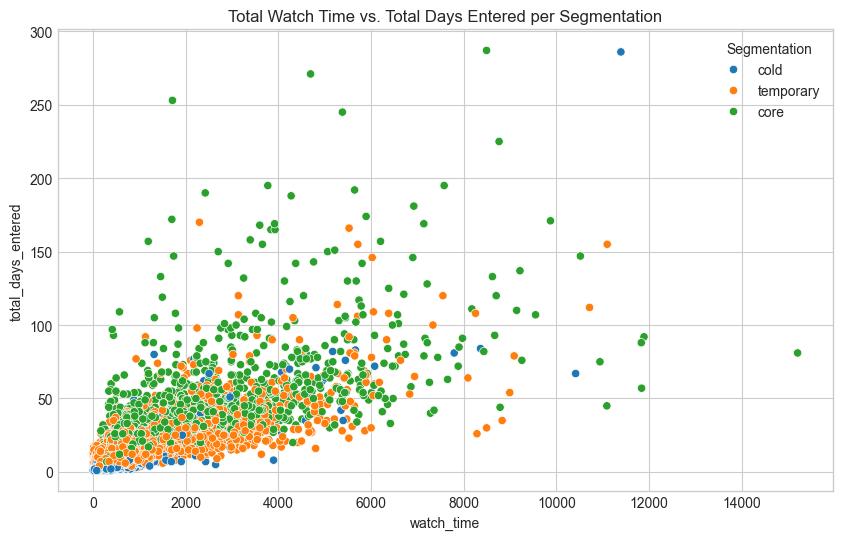

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_user_segementation_avg_learning_time, x='watch_time', y='total_days_entered', hue='segmentation')
# Get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Manually modify the labels
label_map = {'핵심': 'core', '일시적': 'temporary', '냉담': 'cold'}
new_labels = [label_map[label] for label in labels]

plt.title('Total Watch Time vs. Total Days Entered per Segmentation')

# Update the legend with the new labels
plt.legend(handles=handles, labels=new_labels, title='Segmentation')

# Show plot
plt.show()

하지만 학습 시간을 학습 참여 일 수로 나누었을 때 (하루 평균 학습 시간) 박스플롯을 생성 했을 때는 분포가 큰 차이가 없어 보인다. 

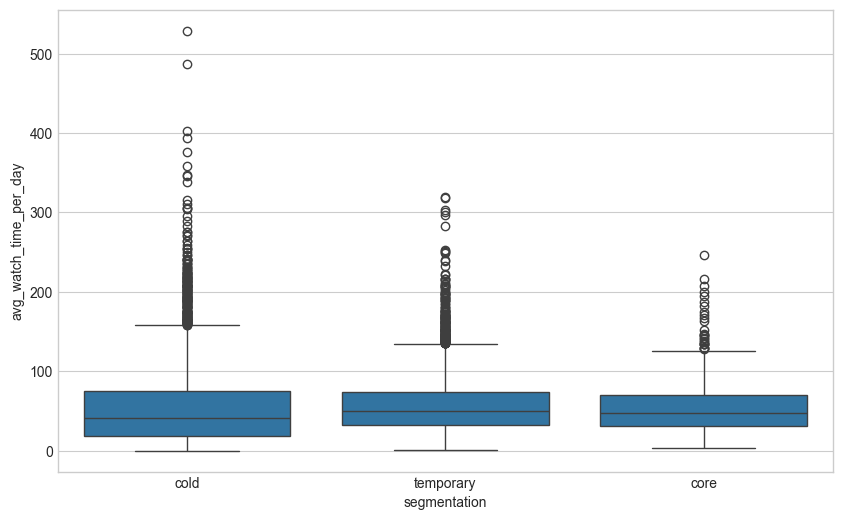

In [125]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_user_segementation_avg_learning_time, 
            x='segmentation', 
            y='avg_watch_time_per_day')

# Modify x-axis labels to use custom labels
label_map = {'핵심': 'core', '일시적': 'temporary', '냉담': 'cold'}
new_labels = [label_map[label] for label in df_user_segementation_avg_learning_time['segmentation'].unique()]

# Set the new x-tick labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

# Show plot
plt.show()